<a href="https://colab.research.google.com/github/DhruboDevPramanik/Deep-Learning/blob/main/Jokes_Generator_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
! pip install kaggle

In [31]:
!pip install opendatasets
import opendatasets as od


In [32]:
od.download("https://www.kaggle.com/datasets/abhinavmoudgil95/short-jokes")

Skipping, found downloaded files in "./short-jokes" (use force=True to force download)


In [33]:
import pandas as pd
df=pd.read_csv("/content/short-jokes/shortjokes.csv")
df.shape

(231657, 2)

In [34]:
# Slice the DataFrame from row 5000 onwards
df = df.iloc[230000:]

# Check the size of the new DataFrame
print(f"New DataFrame shape: {df.shape}")

New DataFrame shape: (1657, 2)


In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [36]:
tokenizer = Tokenizer()

In [37]:
faqs=df['Joke'].tolist()

In [38]:
tokenizer.fit_on_texts(faqs)

In [39]:
print(f"Vocabulary size: {len(tokenizer.word_index)}")

Vocabulary size: 5577


In [40]:
tokenizer.word_index

{'a': 1,
 'the': 2,
 'i': 3,
 'to': 4,
 'you': 5,
 'and': 6,
 'in': 7,
 'of': 8,
 'what': 9,
 'my': 10,
 'is': 11,
 'do': 12,
 'it': 13,
 'was': 14,
 'me': 15,
 'that': 16,
 'for': 17,
 'on': 18,
 'have': 19,
 'he': 20,
 'why': 21,
 'they': 22,
 'with': 23,
 'how': 24,
 'your': 25,
 'are': 26,
 'when': 27,
 'did': 28,
 'if': 29,
 "don't": 30,
 'so': 31,
 'at': 32,
 'just': 33,
 'an': 34,
 'like': 35,
 'because': 36,
 'his': 37,
 'out': 38,
 'but': 39,
 "i'm": 40,
 'get': 41,
 'call': 42,
 'about': 43,
 'this': 44,
 'not': 45,
 'be': 46,
 'up': 47,
 'can': 48,
 "what's": 49,
 'her': 50,
 'know': 51,
 'who': 52,
 'one': 53,
 'people': 54,
 'all': 55,
 'no': 56,
 "it's": 57,
 'she': 58,
 'say': 59,
 'man': 60,
 'from': 61,
 'had': 62,
 'into': 63,
 'does': 64,
 'there': 65,
 'wife': 66,
 'other': 67,
 'two': 68,
 'said': 69,
 'go': 70,
 'only': 71,
 'by': 72,
 "you're": 73,
 'think': 74,
 'their': 75,
 'make': 76,
 'joke': 77,
 'as': 78,
 'them': 79,
 'got': 80,
 'take': 81,
 'we': 82,
 '

In [41]:
len(tokenizer.word_index)

5577

In [42]:
input_sequences = []

for sentence in faqs:
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

    for i in range(1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])


In [43]:
print(f"Total input sequences: {len(input_sequences)}")

Total input sequences: 27345


In [44]:
input_sequences

[[631, 38],
 [631, 38, 8],
 [631, 38, 8, 272],
 [631, 38, 8, 272, 210],
 [631, 38, 8, 272, 210, 632],
 [631, 38, 8, 272, 210, 632, 45],
 [631, 38, 8, 272, 210, 632, 45, 4],
 [631, 38, 8, 272, 210, 632, 45, 4, 273],
 [631, 38, 8, 272, 210, 632, 45, 4, 273, 2261],
 [631, 38, 8, 272, 210, 632, 45, 4, 273, 2261, 109],
 [631, 38, 8, 272, 210, 632, 45, 4, 273, 2261, 109, 23],
 [631, 38, 8, 272, 210, 632, 45, 4, 273, 2261, 109, 23, 105],
 [631, 38, 8, 272, 210, 632, 45, 4, 273, 2261, 109, 23, 105, 2262],
 [631, 38, 8, 272, 210, 632, 45, 4, 273, 2261, 109, 23, 105, 2262, 2263],
 [631, 38, 8, 272, 210, 632, 45, 4, 273, 2261, 109, 23, 105, 2262, 2263, 2264],
 [631,
  38,
  8,
  272,
  210,
  632,
  45,
  4,
  273,
  2261,
  109,
  23,
  105,
  2262,
  2263,
  2264,
  6],
 [631,
  38,
  8,
  272,
  210,
  632,
  45,
  4,
  273,
  2261,
  109,
  23,
  105,
  2262,
  2263,
  2264,
  6,
  961],
 [631,
  38,
  8,
  272,
  210,
  632,
  45,
  4,
  273,
  2261,
  109,
  23,
  105,
  2262,
  2263,
  226

In [45]:
max_len = max([len(x) for x in input_sequences])

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

In [47]:
padded_input_sequences

array([[   0,    0,    0, ...,    0,  631,   38],
       [   0,    0,    0, ...,  631,   38,    8],
       [   0,    0,    0, ...,   38,    8,  272],
       ...,
       [   0,    0,    0, ...,   34, 5577,  686],
       [   0,    0,    0, ..., 5577,  686,    8],
       [   0,    0,    0, ...,  686,    8, 1098]], dtype=int32)

In [48]:
X = padded_input_sequences[:,:-1]

In [49]:
y = padded_input_sequences[:,-1]

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(21876, 42)

In [52]:
y_train.shape

(21876,)

In [53]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(tokenizer.word_index) + 1)

In [54]:
y_train.shape

(21876, 5578)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [1]:
model = Sequential()
model.add(Embedding(input_dim=5578, output_dim=100, input_length=42))
model.add(LSTM(40, return_sequences=True))  # This must return the full sequence
model.add(LSTM(40))  # This can be the final LSTM layer
model.add(Dense(5578, activation='softmax'))

NameError: name 'Sequential' is not defined

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, len(tokenizer.word_index) + 1))

In [80]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 5578, 1000)     │     5,578,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 5578, 150)      │       690,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5578)           │       842,278 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,291,478 (27.81 MB)

 Trainable params: 7,291,478 (27.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_test = to_categorical(y_test, num_classes=len(tokenizer.word_index) + 1)
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")

In [72]:
history = model.fit(
    X_train, y_train,
    epochs=100,

    validation_data=(X_test, y_test)
)

Epoch 1/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.0406 - loss: 6.7148 - val_accuracy: 0.0433 - val_loss: 7.1618
Epoch 2/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.0424 - loss: 6.5952 - val_accuracy: 0.0386 - val_loss: 7.2495
Epoch 3/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.0447 - loss: 6.4992 - val_accuracy: 0.0466 - val_loss: 7.2764
Epoch 4/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.0571 - loss: 6.3330 - val_accuracy: 0.0622 - val_loss: 7.2833
Epoch 5/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.0660 - loss: 6.2055 - val_accuracy: 0.0624 - val_loss: 7.3264
Epoch 6/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.0761 - loss: 6.0484 - val_accuracy: 0.0662 - val_loss: 7.3915
Epoch 7/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.0790 - loss: 5.9203 - val_accuracy: 0.0768 - val_loss: 7.4272
Epoch 8/100
684/684 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.0866 - loss: 5

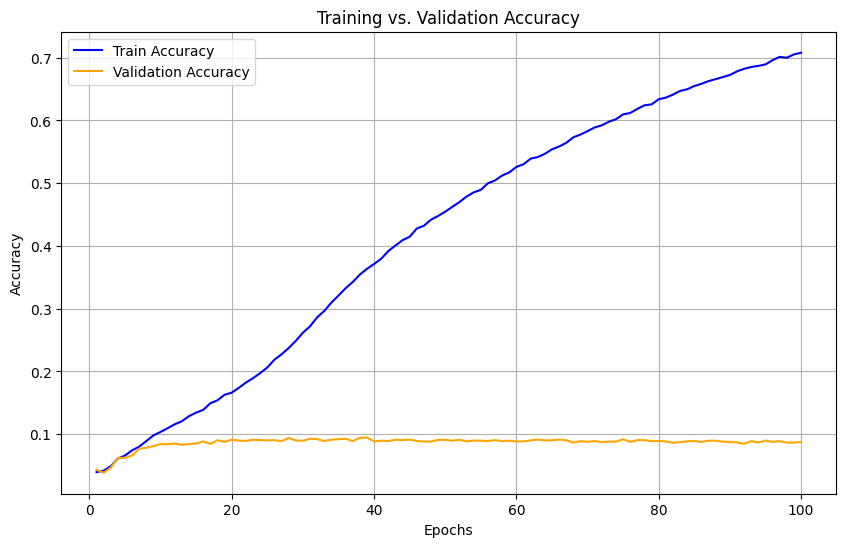

In [73]:
import matplotlib.pyplot as plt

# Extract accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy', color='blue')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy', color='orange')

plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.grid(True)
plt.show()


In [76]:
import time
import numpy as np
text = "a"

for i in range(20):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
a man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
a man walks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
a man walks into
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
a man walks into a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
a man walks into a bar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
a man walks into a bar who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
a man walks into a bar who wears
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
a man walks into a bar who wears a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
a man walks into a bar who wears a car
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
a man walks into a bar who wears a car in
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
a man walks into a bar who wears a car in the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
a man walks into a bar who wears a car in the world
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
a man walks into a bar who wears a car in the world is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
a man walks into a bar who wears a car in the world is staring